# Data Engineering Pipeline

This notebook implements a complete data engineering pipeline for analysis and processing of the provided dataset.

## Pipeline Structure:
1. **Setup and Dependencies Installation**
2. **Data Loading and Initial Analysis**  
3. **Exploratory Analysis - Class Balance**
4. **Data Preprocessing**
5. **Model Preparation**

## 1. Setup and Dependencies Installation

Install and import all necessary libraries for the data engineering pipeline:

In [1]:
%pip install seaborn --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import joblib

Note: you may need to restart the kernel to use updated packages.


## 2. Data Loading and Initial Analysis

Load the dataset and perform an initial analysis of its characteristics:

In [2]:
print("--- Step 1: Loading and Analyzing the Provided Dataset ---")
try:
	import pandas as pd  # Ensure pandas is imported
	df = pd.read_csv('dataset-IA.csv', sep=';')
	print("Dataset 'dataset-IA.csv' loaded successfully.")
except FileNotFoundError:
	print("Error: The file 'dataset-IA.csv' was not found.")
	exit()

df.columns = ['A1', 'B1', 'C1', 'A2', 'B2', 'C2', 'A3', 'B3', 'C3', 'Class']
print("\nDataset Information:")
df.info()

--- Step 1: Loading and Analyzing the Provided Dataset ---
Dataset 'dataset-IA.csv' loaded successfully.

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A1      750 non-null    int64 
 1   B1      750 non-null    int64 
 2   C1      750 non-null    int64 
 3   A2      750 non-null    int64 
 4   B2      750 non-null    int64 
 5   C2      750 non-null    int64 
 6   A3      750 non-null    int64 
 7   B3      750 non-null    int64 
 8   C3      750 non-null    int64 
 9   Class   750 non-null    object
dtypes: int64(9), object(1)
memory usage: 58.7+ KB


## 3. Exploratory Analysis - Class Balance

Check the class distribution in the dataset to identify possible imbalances:


--- Step 2: Checking Class Balance ---
Class
Fim de Jogo             250
Possibilidade de Fim    250
Tem Jogo                250
Name: count, dtype: int64


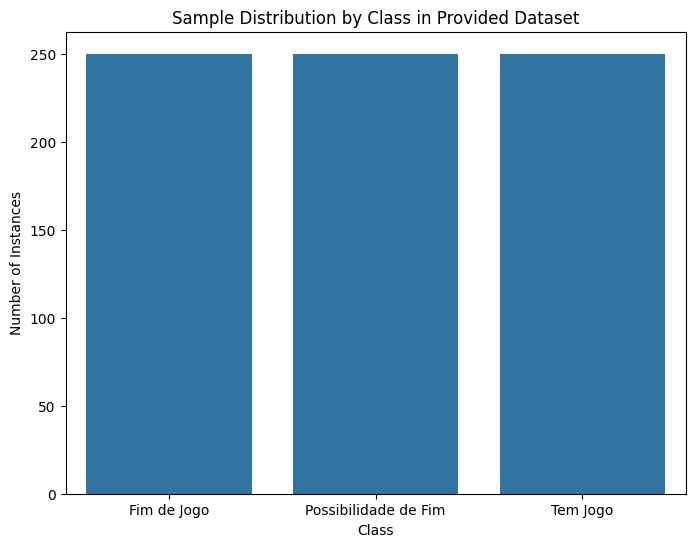

In [3]:
print("\n--- Step 2: Checking Class Balance ---")
class_counts = df['Class'].value_counts()
print(class_counts)

# Make sure necessary libraries are imported
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df, order=class_counts.index)
plt.title('Sample Distribution by Class in Provided Dataset')
plt.ylabel('Number of Instances')
plt.xlabel('Class')
plt.savefig('class_distribution_loaded.png')
plt.show()

## 4. Data Preprocessing and Splitting

Perform categorical feature encoding and split data into training, validation and test sets:

In [4]:
print("\n--- Step 3: Feature Engineering and Data Splitting ---")
X = df.drop('Class', axis=1)
y = df['Class']

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
import joblib

onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_onehot = onehot_encoder.fit_transform(X)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

df_processed = pd.DataFrame(X_onehot, columns=onehot_encoder.get_feature_names_out(X.columns))
df_processed['target'] = y_encoded

train_df, temp_df = train_test_split(df_processed, test_size=0.2, random_state=42, stratify=df_processed['target'])
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['target'])

train_df.to_csv('train_dataset.csv', index=False)
val_df.to_csv('validation_dataset.csv', index=False)
test_df.to_csv('test_dataset.csv', index=False)
joblib.dump(onehot_encoder, 'onehot_encoder.joblib')
joblib.dump(label_encoder, 'label_encoder.joblib')

print("\nTraining, validation and test datasets were saved successfully!")


--- Step 3: Feature Engineering and Data Splitting ---

Training, validation and test datasets were saved successfully!
